# **IPL 2023 Winning Prediction 🏆 and Full Data Analysis**

*This Project is just for Learning Purpose, Please do not use it for Gambling or any Fantasy League.*

<img src = 'https://www.insidesport.in/wp-content/uploads/2022/01/eng-banner-2.jpg'>



## **Contents in this Project**

1. Data Loading and Summary Checking
2. Data Cleaning
3. Feature Extraction
4. EDA and Data Visualisation
5. Best Player Clusters since 2008 based on Performance
6. IPL Match Winning Prediction 🏆



In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [187]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [188]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [189]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [190]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [191]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [192]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [193]:
matches[matches['WinningTeam'].isna()]
#these four matches are abonded

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


### These matches has no Result becomes matches are stopped due to Rain or other reasons, so let's remove them from the data

In [194]:
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()

In [195]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [196]:
matches[matches['Season']=='2020/21'].head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi


In [197]:
# Convert the Date columns into their respective data types
matches['Date'] = pd.to_datetime(matches['Date'])

In [198]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [199]:
matches.drop('Season',axis=1, inplace=True)

In [200]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [201]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [202]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [203]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [204]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [205]:
print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [206]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [207]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,139,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [208]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,139,2,161
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [209]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,139,2,161,57.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [210]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0


In [211]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [212]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


### So, Here we have Batsman Statistics, Now let's create Bowler Statistics

In [213]:
bowlgroup = balls.groupby(['bowler'])

In [214]:
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [215]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [216]:
# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [217]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [218]:
 # Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0


In [219]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [220]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [221]:
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0


In [222]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf


In [223]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [224]:
final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [225]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [226]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


### Now, We have Batsman, Bowler Statistics, Let's merge them using the Merge Function and make a full_fledge DataFrame with all information of players and then we get the Clusters of Best players out of all.

In [227]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [228]:
import plotly.express as px

In [229]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [230]:
pip install plotly nbformat pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [231]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [232]:
import nbformat
print(nbformat.__version__)  # Ensure this prints 4.2.0 or higher


5.10.4


In [233]:
import plotly.express as px
import pandas as pd

# Example DataFrame (replace final_df with your actual DataFrame)
final_df = pd.DataFrame({
    'count': [10, 15, 7, 20],
    'runs': [100, 150, 70, 200],
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a bar plot
fig = px.bar(final_df, x='count', y='runs', title='Number of runs scored by different players and they get Player of Match', hover_name='player', color='runs')

# Show the plot
fig.show()


In [234]:
import nbformat
print(nbformat.__version__)


5.10.4


In [235]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [236]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'count': [10, 15, 7, 20],
    'runs': [100, 150, 70, 200],
    'wickets': [5, 3, 8, 2],  # Add the 'wickets' column
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a bar plot
fig = px.bar(final_df, x='count', y='wickets', title='Number of Wickets taken by different players and they get Player of Match', hover_name='player', color='wickets')

# Show the plot
fig.show()


In [237]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],  # Example data for matches played
    'count': [5, 8, 3, 10],       # Example data for Player of the Match count
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='count', color='count',
                 size='count', hover_name='player', title='Player of the Match')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [238]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],      # Example data for matches played
    'bat_strike': [120.5, 110.2, 130.8, 115.3],  # Example data for batting strike rate
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='bat_strike', color='bat_strike',
                 size='bat_strike', hover_name='player', title='Batsman Strike Rate')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [239]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'catches': [8, 5, 12, 10],      # Example data for number of catches
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='catches', color='catches',
                 size='catches', hover_name='player', title='Most Catches by Players')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [240]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],        # Example data for matches played
    'bowl_econ': [6.5, 5.2, 7.1, 6.0],  # Example data for bowling economy
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='bowl_econ', color='bowl_econ',
                 size='matches', hover_name='player', title='Bowling Economy')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [241]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '6s': [30, 25, 15, 35],        # Example data for number of 6s hit
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='6s', color='6s',
                 size='6s', hover_name='player', title='Most 6s by a Batsman')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()


In [242]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '4s': [50, 35, 45, 40],        # Example data for number of 4s hit
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='4s', color='4s',
                 size='4s', hover_name='player', title='Most 4s by a Batsman')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


### As we see the best players in the IPL so far, Let's see the players who miss opportunities and score most time 0's to balls they faced or out most of the time in IPL so far.

In [243]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '0s': [100, 80, 120, 90],     # Example data for number of 0s (dots) faced
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='0s', color='0s',
                 size='0s', hover_name='player', title='Most 0s by a Batsman for each ball they face')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


In [244]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'player_out': [10, 15, 7, 20],  # Example data for number of times a player was out
    'runs': [500, 600, 300, 700],   # Example data for runs scored
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Calculate the number of not out matches
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name='player',
                 title='Most Times Out by a Batsman vs Matches Played and Not Out Matches')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


## So after getting to know about about players best and lost performances, Let's move to visualizing Which are top 10 Batsman, Bowlers, Strike Rate, Best Team.

In [245]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,player_out,runs,player,not_out


In [246]:
import pandas as pd
import plotly.graph_objects as go

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'player_out': [10, 15, 7, 20],  # Example data for number of times a player was out
    'runs': [500, 600, 300, 700],   # Example data for runs scored
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Calculate the number of not out matches
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Calculate batting average (assuming bat_average is runs divided by outs)
final_df['bat_average'] = final_df['runs'] / final_df['player_out']

# Sort the DataFrame by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)

# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10['player'], y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])

# Update the layout
fig.update_layout(
    title='Top 10 Batsmen based on Batting Average',
    xaxis_title="Player",
    yaxis_title="Batting Average",
    coloraxis=dict(colorscale='Viridis')
)

# Show the plot
fig.show()


In [247]:
import pandas as pd
import plotly.graph_objects as go

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],              # Example data for matches played
    'wickets': [20, 25, 15, 30],              # Example data for wickets taken
    'runs_conceded': [500, 600, 300, 700],    # Example data for runs conceded
    'balls_thrown': [1200, 1400, 1000, 1500], # Example data for balls thrown
    'player': ['Bowler A', 'Bowler B', 'Bowler C', 'Bowler D']
})

# Calculate relevant metrics (if not already present)
# For example, if wickets are not directly available, calculate or retrieve them from your data source

# Sort the DataFrame by wickets and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)

# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10['player'], 
    y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' +
         df_top10['runs_conceded'].astype(str) + ' Runs Given, ' + df_top10['balls_thrown'].astype(str) + ' Balls Thrown',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])

fig.update_layout(
    title='Top 10 Bowlers based on Wickets',
    xaxis_title="Player",
    yaxis_title="Wickets",
    coloraxis=dict(colorscale='Blues')
)

# Show the plot
fig.show()


In [248]:
matches.head(2)

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022


In [249]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [250]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [251]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [252]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

## Let's find out the Best Players of Time using K-Means Clustering

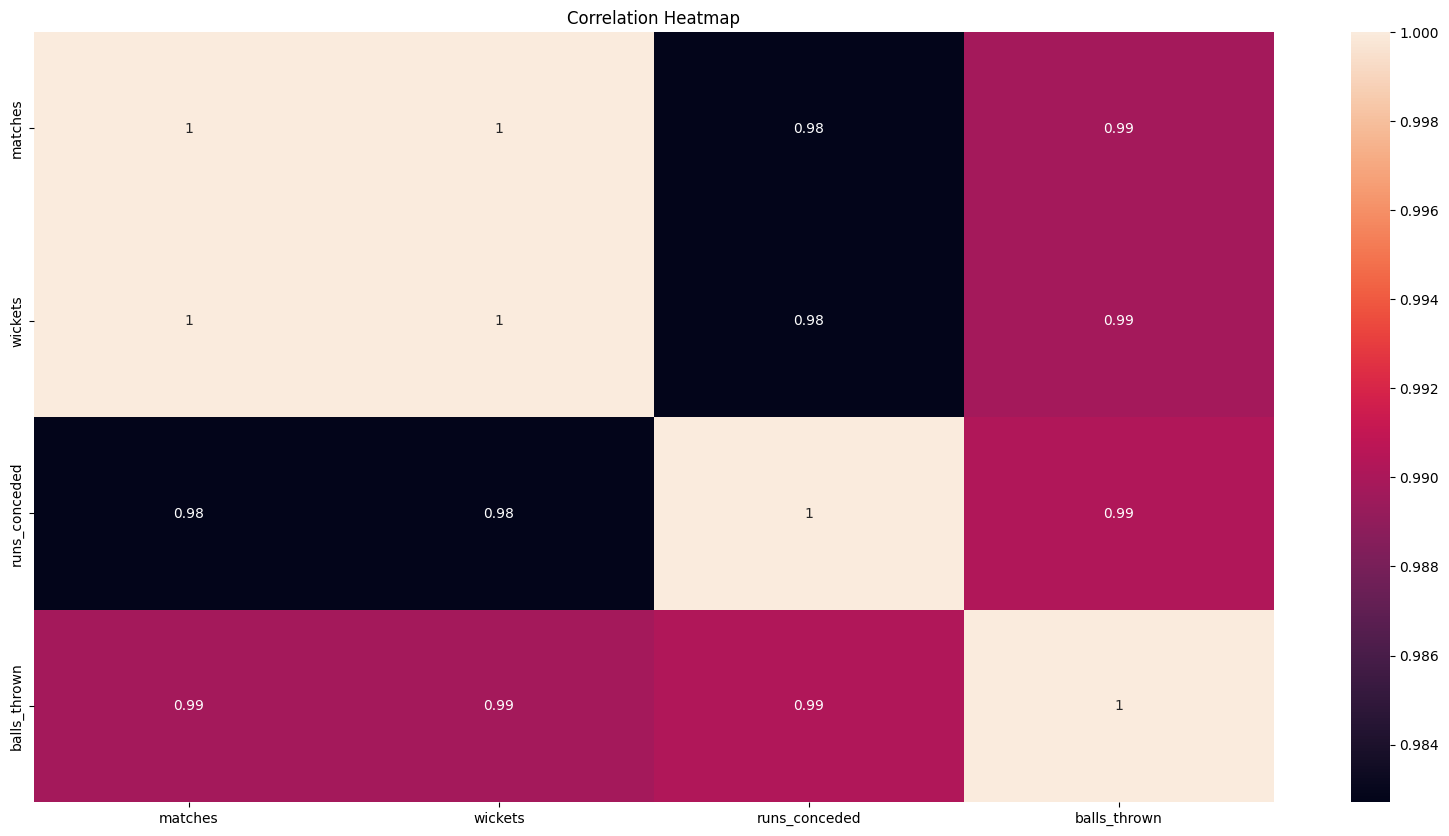

In [253]:
# Let's Remove the Most Correlated Columns
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df contains numeric columns for correlation analysis
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 10))
sns.heatmap(final_df[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [254]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [255]:
print(final_df.columns)


Index(['matches', 'wickets', 'runs_conceded', 'balls_thrown', 'player'], dtype='object')


In [256]:
# Check which columns exist in final_df
existing_columns = final_df.columns

# Columns to drop
columns_to_drop = [
    'runs', '0s', '1s', '2s', '3s', '4s', '6s',
    'player_out', 'wickets', 'overs', 'bowl_strike_rate', 'not_out'
]

# Verify each column exists before dropping
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns from final_df
top_columns = final_df.drop(columns_to_drop, axis=1)


In [257]:
final_df_new = top_columns.dropna()
final_df_new.head()


,matches,runs_conceded,balls_thrown,player
0,15,500,1200,Bowler A
1,20,600,1400,Bowler B
2,10,300,1000,Bowler C
3,25,700,1500,Bowler D


In [258]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [259]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [260]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example of filtering numeric columns only
numeric_columns = final_df_new.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new[numeric_columns]),
    columns=numeric_columns,
    index=final_df_new.index
)

scaled_data.head()


,matches,runs_conceded,balls_thrown
0,-0.447214,-0.169031,-0.390567
1,0.447214,0.507093,0.650945
2,-1.341641,-1.521278,-1.432078
3,1.341641,1.183216,1.171700


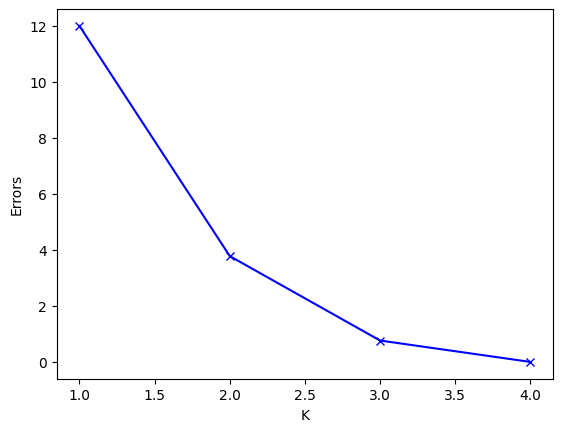

In [261]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'scaled_data' is your DataFrame
n_samples = scaled_data.shape[0]

# Adjust clusters range to be within the number of samples
clusters = range(1, min(12, n_samples + 1))
errors = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)

plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters, errors, 'bx-')
plt.show()


In [262]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [263]:
final_df_new.head()

,matches,runs_conceded,balls_thrown,player,cluster
0,15,500,1200,Bowler A,2
1,20,600,1400,Bowler B,0
2,10,300,1000,Bowler C,1
3,25,700,1500,Bowler D,3


In [264]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [265]:
topPlayers_cluster

,PlayerNames,cluster
0,0,2
1,1,0
2,2,1
3,3,3


In [266]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [267]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [268]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [269]:
TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,1,2,0,3


In [270]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Ball_by_Ball_2008_2022.csv')

In [271]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [272]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(10)

,ID,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [273]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [274]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [275]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [276]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [277]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [278]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [279]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64

In [280]:
print(matches.columns)


Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')


In [281]:
# Exclude 'target' if it's not necessary
matches = matches[['ID', 'City', 'Team1', 'Team2', 'WinningTeam']].dropna()
matches.head()


,ID,City,Team1,Team2,WinningTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings


In [282]:
# Example: Creating a 'target' column if it is supposed to be based on some condition
matches['target'] = (matches['WinningTeam'] == matches['Team1']).astype(int)  # This is just an example condition
matches = matches[['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target']].dropna()
matches.head()


,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,0
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,1
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,0


In [283]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [284]:
balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [285]:
final = matches.merge(balls, on='ID')
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [286]:
final = final[final['innings']==2]
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [287]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [288]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0


In [289]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115


In [290]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10


In [291]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [292]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [293]:
final['result'] = final.apply(result, axis=1)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10,0.0,0.0,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10,0.0,0.0,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10,2.0,0.0,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10,1.5,0.0,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10,1.2,0.0,1


In [294]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10,0.0,0.0,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10,0.0,0.0,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10,2.0,0.0,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10,1.5,0.0,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10,1.2,0.0,1,Rajasthan Royals


In [295]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,119,10,0.0,0.0,0,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,118,10,0.0,0.0,0,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,117,10,2.0,0.0,0,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,116,10,1.5,0.0,0,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,115,10,1.2,0.0,0,1


In [296]:
winningPred.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
12738,Royal Challengers Bangalore,Chennai Super Kings,Mumbai,0,71,6,8.081633,0.0,1,0


In [297]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['BattingTeam', 'BowlingTeam', 'City'])
],
remainder='passthrough')

# If you need to fit and transform data using the transformer
# Example:
# transformed_data = trf.fit_transform(your_dataframe)


In [298]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [301]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [302]:
pipe.predict_proba(X_test)

array([[0.07, 0.93],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.01, 0.99],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [303]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 120, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

In [304]:
pipe.predict_proba(team2023)

array([[0.93333333, 0.06666667]])

In [305]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')

# Preprocessing: Removing rows with NaN values in 'WinningTeam' and dropping unwanted columns
matches = matches.dropna(subset=['WinningTeam'])
matches.drop(['City', 'ID', 'method'], axis=1, inplace=True)

# Separate features and target
X = matches[['Team1', 'Team2', 'TossWinner', 'TossDecision']]
y = matches['WinningTeam']

# Convert categorical data to numerical data
categorical_features = ['Team1', 'Team2', 'TossWinner', 'TossDecision']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Example prediction
team2023 = pd.DataFrame({
    'Team1': ['chennai super kings'],
    'Team2': ['mumbai indians'],
    'TossWinner': ['chennai super kings'],
    'TossDecision': ['bat']
})

# Predict probabilities
proba = pipeline.predict_proba(team2023)
print(f'Prediction probabilities: {proba}')


Accuracy: 50.70%
Prediction probabilities: [[0.07285165 0.05802218 0.05961522 0.08463753 0.03824308 0.04152812
  0.07910921 0.01163262 0.0647021  0.01825535 0.07645201 0.05868311
  0.03391114 0.08039567 0.01150367 0.03024823 0.10625184 0.0739573 ]]


In [306]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the data
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')

# Preprocessing: Removing rows with NaN values in 'WinningTeam' and dropping unwanted columns
matches = matches.dropna(subset=['WinningTeam'])
matches['Season'] = pd.DatetimeIndex(matches['Date']).year
matches['Team1Win'] = (matches['WinningTeam'] == matches['Team1']).astype(int)
matches.drop(['City', 'ID', 'method', 'Date', 'Player_of_Match'], axis=1, inplace=True)

# Separate features and target
X = matches[['Team1', 'Team2', 'TossWinner', 'TossDecision', 'Venue', 'Season']]
y = matches['Team1Win']

# Convert categorical data to numerical data
categorical_features = ['Team1', 'Team2', 'TossWinner', 'TossDecision', 'Venue']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Example prediction
team2023 = pd.DataFrame({
    'Team1': ['chennai super kings'],
    'Team2': ['mumbai indians'],
    'TossWinner': ['chennai super kings'],
    'TossDecision': ['bat'],
    'Venue': ['Wankhede Stadium'],
    'Season': [2023]
})

# Predict probabilities
proba = best_model.predict_proba(team2023)
print(f'Prediction probabilities: {proba}')


Accuracy: 50.00%
Prediction probabilities: [[0.33941667 0.66058333]]


In [307]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')

# Preprocessing: Removing rows with NaN values in 'WinningTeam' and dropping unwanted columns
matches = matches.dropna(subset=['WinningTeam'])
matches.drop(['City', 'ID', 'method'], axis=1, inplace=True)

# Convert categorical data to numerical data
matches['Team1'] = matches['Team1'].astype('category').cat.codes
matches['Team2'] = matches['Team2'].astype('category').cat.codes
matches['TossWinner'] = matches['TossWinner'].astype('category').cat.codes
matches['TossDecision'] = matches['TossDecision'].astype('category').cat.codes
matches['WinningTeam'] = matches['WinningTeam'].astype('category').cat.codes

# Feature extraction and splitting the dataset
X = matches[['Team1', 'Team2', 'TossWinner', 'TossDecision']]
y = matches['WinningTeam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 16.20%


In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [309]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [310]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [311]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [312]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [313]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [314]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [315]:
matches[matches['WinningTeam'].isna()]
#these four matches are abonded

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


### These matches has no Result becomes matches are stopped due to Rain or other reasons, so let's remove them from the data

In [316]:
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()

In [317]:
matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [318]:
matches[matches['Season']=='2020/21'].head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi


In [319]:
# Convert the Date columns into their respective data types
matches['Date'] = pd.to_datetime(matches['Date'])

In [320]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [321]:
matches.drop('Season',axis=1, inplace=True)

In [322]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [323]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [324]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [325]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


### Okey! Now we Have cleaned Match Dataframe, let's check the Ball by Ball Datafram and Build the Statistical Dataframe out of it so that we can build the Dashbaord or Perform Visualisation out of it.

In [326]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [327]:
print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [328]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [329]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,139,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [330]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,139,2,161
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [331]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,139,2,161,57.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [332]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0


In [333]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [334]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


### So, Here we have Batsman Statistics, Now let's create Bowler Statistics

In [335]:
bowlgroup = balls.groupby(['bowler'])

In [336]:
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [337]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [338]:
# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [339]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [340]:
 # Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0


In [341]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [342]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [343]:
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0


In [344]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf


In [345]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [346]:
final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [347]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [348]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


### Now, We have Batsman, Bowler Statistics, Let's merge them using the Merge Function and make a full_fledge DataFrame with all information of players and then we get the Clusters of Best players out of all.

In [349]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [350]:
import plotly.express as px

In [351]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [352]:
pip install plotly nbformat pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [353]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [354]:
import nbformat
print(nbformat.__version__)  # Ensure this prints 4.2.0 or higher


5.10.4


In [355]:
import plotly.express as px
import pandas as pd

# Example DataFrame (replace final_df with your actual DataFrame)
final_df = pd.DataFrame({
    'count': [10, 15, 7, 20],
    'runs': [100, 150, 70, 200],
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a bar plot
fig = px.bar(final_df, x='count', y='runs', title='Number of runs scored by different players and they get Player of Match', hover_name='player', color='runs')

# Show the plot
fig.show()


In [356]:
import nbformat
print(nbformat.__version__)


5.10.4


In [357]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [358]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'count': [10, 15, 7, 20],
    'runs': [100, 150, 70, 200],
    'wickets': [5, 3, 8, 2],  # Add the 'wickets' column
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a bar plot
fig = px.bar(final_df, x='count', y='wickets', title='Number of Wickets taken by different players and they get Player of Match', hover_name='player', color='wickets')

# Show the plot
fig.show()


In [359]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],  # Example data for matches played
    'count': [5, 8, 3, 10],       # Example data for Player of the Match count
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='count', color='count',
                 size='count', hover_name='player', title='Player of the Match')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [360]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],      # Example data for matches played
    'bat_strike': [120.5, 110.2, 130.8, 115.3],  # Example data for batting strike rate
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='bat_strike', color='bat_strike',
                 size='bat_strike', hover_name='player', title='Batsman Strike Rate')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [361]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'catches': [8, 5, 12, 10],      # Example data for number of catches
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='catches', color='catches',
                 size='catches', hover_name='player', title='Most Catches by Players')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [362]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],        # Example data for matches played
    'bowl_econ': [6.5, 5.2, 7.1, 6.0],  # Example data for bowling economy
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='bowl_econ', color='bowl_econ',
                 size='matches', hover_name='player', title='Bowling Economy')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()


In [363]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '6s': [30, 25, 15, 35],        # Example data for number of 6s hit
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='6s', color='6s',
                 size='6s', hover_name='player', title='Most 6s by a Batsman')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()


In [364]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '4s': [50, 35, 45, 40],        # Example data for number of 4s hit
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='4s', color='4s',
                 size='4s', hover_name='player', title='Most 4s by a Batsman')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


### As we see the best players in the IPL so far, Let's see the players who miss opportunities and score most time 0's to balls they faced or out most of the time in IPL so far.

In [365]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],   # Example data for matches played
    '0s': [100, 80, 120, 90],     # Example data for number of 0s (dots) faced
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Create a scatter plot
fig = px.scatter(final_df, x='matches', y='0s', color='0s',
                 size='0s', hover_name='player', title='Most 0s by a Batsman for each ball they face')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


In [366]:
import pandas as pd
import plotly.express as px

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'player_out': [10, 15, 7, 20],  # Example data for number of times a player was out
    'runs': [500, 600, 300, 700],   # Example data for runs scored
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Calculate the number of not out matches
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name='player',
                 title='Most Times Out by a Batsman vs Matches Played and Not Out Matches')

# Update color scale (optional)
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()


## So after getting to know about about players best and lost performances, Let's move to visualizing Which are top 10 Batsman, Bowlers, Strike Rate, Best Team.

In [367]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,player_out,runs,player,not_out


In [368]:
import pandas as pd
import plotly.graph_objects as go

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],    # Example data for matches played
    'player_out': [10, 15, 7, 20],  # Example data for number of times a player was out
    'runs': [500, 600, 300, 700],   # Example data for runs scored
    'player': ['Player A', 'Player B', 'Player C', 'Player D']
})

# Calculate the number of not out matches
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Calculate batting average (assuming bat_average is runs divided by outs)
final_df['bat_average'] = final_df['runs'] / final_df['player_out']

# Sort the DataFrame by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)

# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10['player'], y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])

# Update the layout
fig.update_layout(
    title='Top 10 Batsmen based on Batting Average',
    xaxis_title="Player",
    yaxis_title="Batting Average",
    coloraxis=dict(colorscale='Viridis')
)

# Show the plot
fig.show()


In [369]:
import pandas as pd
import plotly.graph_objects as go

# Example DataFrame (replace with your actual data)
final_df = pd.DataFrame({
    'matches': [15, 20, 10, 25],              # Example data for matches played
    'wickets': [20, 25, 15, 30],              # Example data for wickets taken
    'runs_conceded': [500, 600, 300, 700],    # Example data for runs conceded
    'balls_thrown': [1200, 1400, 1000, 1500], # Example data for balls thrown
    'player': ['Bowler A', 'Bowler B', 'Bowler C', 'Bowler D']
})

# Calculate relevant metrics (if not already present)
# For example, if wickets are not directly available, calculate or retrieve them from your data source

# Sort the DataFrame by wickets and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)

# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10['player'], 
    y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' +
         df_top10['runs_conceded'].astype(str) + ' Runs Given, ' + df_top10['balls_thrown'].astype(str) + ' Balls Thrown',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])

fig.update_layout(
    title='Top 10 Bowlers based on Wickets',
    xaxis_title="Player",
    yaxis_title="Wickets",
    coloraxis=dict(colorscale='Blues')
)

# Show the plot
fig.show()


In [370]:
matches.head(2)

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022


In [371]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [372]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [373]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [374]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

## Let's find out the Best Players of Time using K-Means Clustering

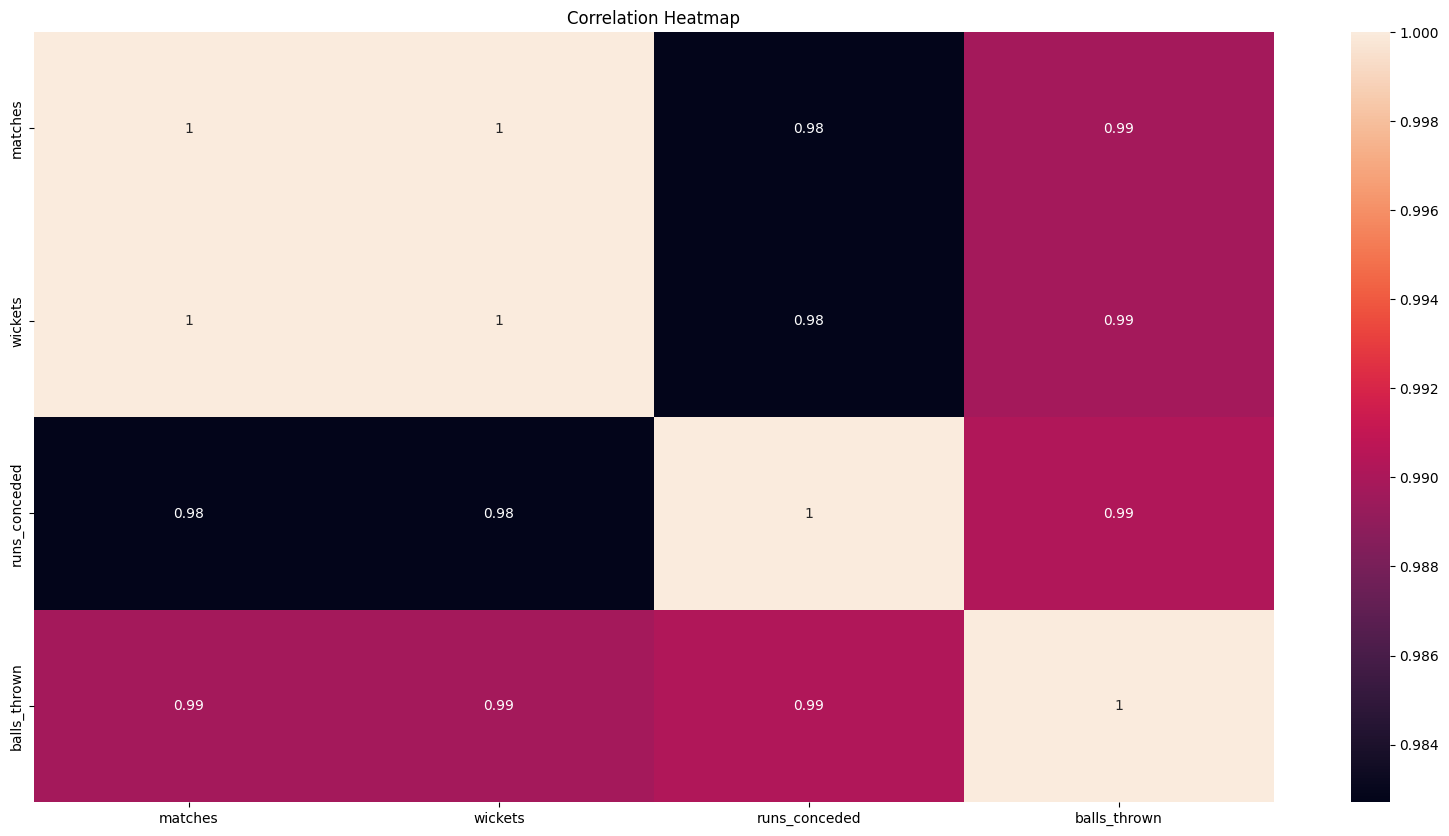

In [375]:
# Let's Remove the Most Correlated Columns
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df contains numeric columns for correlation analysis
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 10))
sns.heatmap(final_df[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [376]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [377]:
print(final_df.columns)


Index(['matches', 'wickets', 'runs_conceded', 'balls_thrown', 'player'], dtype='object')


In [378]:
# Check which columns exist in final_df
existing_columns = final_df.columns

# Columns to drop
columns_to_drop = [
    'runs', '0s', '1s', '2s', '3s', '4s', '6s',
    'player_out', 'wickets', 'overs', 'bowl_strike_rate', 'not_out'
]

# Verify each column exists before dropping
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns from final_df
top_columns = final_df.drop(columns_to_drop, axis=1)


In [379]:
final_df_new = top_columns.dropna()
final_df_new.head()


,matches,runs_conceded,balls_thrown,player
0,15,500,1200,Bowler A
1,20,600,1400,Bowler B
2,10,300,1000,Bowler C
3,25,700,1500,Bowler D


In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [381]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\ruchi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [382]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example of filtering numeric columns only
numeric_columns = final_df_new.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new[numeric_columns]),
    columns=numeric_columns,
    index=final_df_new.index
)

scaled_data.head()


,matches,runs_conceded,balls_thrown
0,-0.447214,-0.169031,-0.390567
1,0.447214,0.507093,0.650945
2,-1.341641,-1.521278,-1.432078
3,1.341641,1.183216,1.171700


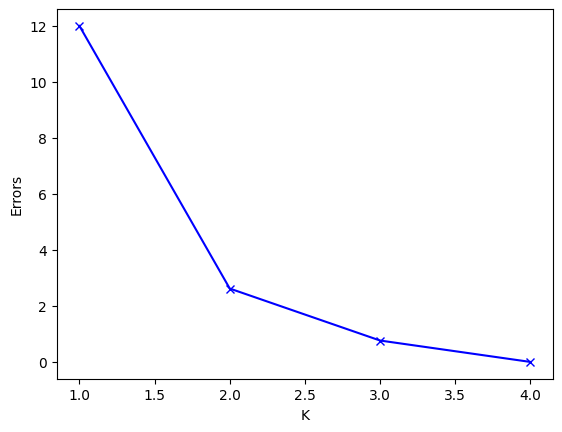

In [383]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'scaled_data' is your DataFrame
n_samples = scaled_data.shape[0]

# Adjust clusters range to be within the number of samples
clusters = range(1, min(12, n_samples + 1))
errors = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)

plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters, errors, 'bx-')
plt.show()


In [384]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

In [385]:
final_df_new.head()

,matches,runs_conceded,balls_thrown,player,cluster
0,15,500,1200,Bowler A,2
1,20,600,1400,Bowler B,3
2,10,300,1000,Bowler C,0
3,25,700,1500,Bowler D,1


In [386]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [387]:
topPlayers_cluster

,PlayerNames,cluster
0,0,2
1,1,3
2,2,0
3,3,1


In [388]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [389]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [390]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [391]:
TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,2,3,0,1


In [392]:
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Ball_by_Ball_2008_2022.csv')

In [393]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [394]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(10)

,ID,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [395]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [396]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')


matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [397]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [398]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [399]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [400]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [401]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64

In [402]:
print(matches.columns)


Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')


In [403]:
# Exclude 'target' if it's not necessary
matches = matches[['ID', 'City', 'Team1', 'Team2', 'WinningTeam']].dropna()
matches.head()


,ID,City,Team1,Team2,WinningTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings


In [404]:
# Example: Creating a 'target' column if it is supposed to be based on some condition
matches['target'] = (matches['WinningTeam'] == matches['Team1']).astype(int)  # This is just an example condition
matches = matches[['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target']].dropna()
matches.head()


,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,0
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,1
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,0


In [405]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [406]:
balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [407]:
final = matches.merge(balls, on='ID')
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [408]:
final = final[final['innings']==2]
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [409]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [410]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0


In [411]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115


In [412]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10


In [413]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [414]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [415]:
final['result'] = final.apply(result, axis=1)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10,0.0,0.0,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10,0.0,0.0,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10,2.0,0.0,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10,1.5,0.0,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10,1.2,0.0,1


In [416]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,119,10,0.0,0.0,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,0,118,10,0.0,0.0,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,117,10,2.0,0.0,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,116,10,1.5,0.0,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,0,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,0,115,10,1.2,0.0,1,Rajasthan Royals


In [417]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,119,10,0.0,0.0,0,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,118,10,0.0,0.0,0,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,117,10,2.0,0.0,0,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,116,10,1.5,0.0,0,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,0,115,10,1.2,0.0,0,1


In [418]:
winningPred.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
95088,Sunrisers Hyderabad,Mumbai Indians,Mumbai,0,95,10,9.6,0.0,1,0


In [419]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['BattingTeam', 'BowlingTeam', 'City'])
],
remainder='passthrough')

# If you need to fit and transform data using the transformer
# Example:
# transformed_data = trf.fit_transform(your_dataframe)


In [420]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [423]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [424]:
pipe.predict_proba(X_test)

array([[0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.01, 0.99]])

In [425]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 120, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

In [426]:
pipe.predict_proba(team2023)

array([[0.98, 0.02]])

In [427]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the data
matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')

# Preprocessing: Removing rows with NaN values in 'WinningTeam' and dropping unwanted columns
matches = matches.dropna(subset=['WinningTeam'])
matches['Season'] = pd.DatetimeIndex(matches['Date']).year
matches['Team1Win'] = (matches['WinningTeam'] == matches['Team1']).astype(int)
matches.drop(['City', 'ID', 'method', 'Date', 'Player_of_Match'], axis=1, inplace=True)

# Additional feature: Team's win/loss streaks
team_win_streak = matches.groupby('Team1')['Team1Win'].rolling(window=5).sum().reset_index(level=0, drop=True)
matches['Team1WinStreak'] = team_win_streak.fillna(0)
team_loss_streak = matches.groupby('Team1')['Team1Win'].rolling(window=5).apply(lambda x: 5-x.sum()).reset_index(level=0, drop=True)
matches['Team1LossStreak'] = team_loss_streak.fillna(0)

# Separate features and target
X = matches[['Team1', 'Team2', 'TossWinner', 'TossDecision', 'Venue', 'Season', 'Team1WinStreak', 'Team1LossStreak']]
y = matches['Team1Win']

# Convert categorical data to numerical data
categorical_features = ['Team1', 'Team2', 'TossWinner', 'TossDecision', 'Venue']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', StandardScaler(), ['Season', 'Team1WinStreak', 'Team1LossStreak'])
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Example prediction
team2023 = pd.DataFrame({
    'Team1': ['chennai super kings'],
    'Team2': ['mumbai indians'],
    'TossWinner': ['chennai super kings'],
    'TossDecision': ['bat'],
    'Venue': ['Wankhede Stadium'],
    'Season': [2023],
    'Team1WinStreak': [0],  # Set appropriate values
    'Team1LossStreak': [0]  # Set appropriate values
})

# Predict probabilities
proba = best_model.predict_proba(team2023)
print(f'Prediction probabilities: {proba}')


Accuracy: 71.13%
Prediction probabilities: [[0.51903388 0.48096612]]
